In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
# import japanize_matplotlib
from sklearn.linear_model import LinearRegression

plt.rcParams['font.family'] = "cm"

def partition(pH, abs, v_aq, v_o):
    return np.log10(v_aq/v_o * 1/(abs[-1]/abs[0:-1]-1))

def func1(pH):
    H = 10-pH
    logD = np.log10(720/(H/9e-6 + 1 + 2e-10/H))

coefficient: [[0.96655045]]
score: 0.938992010492878


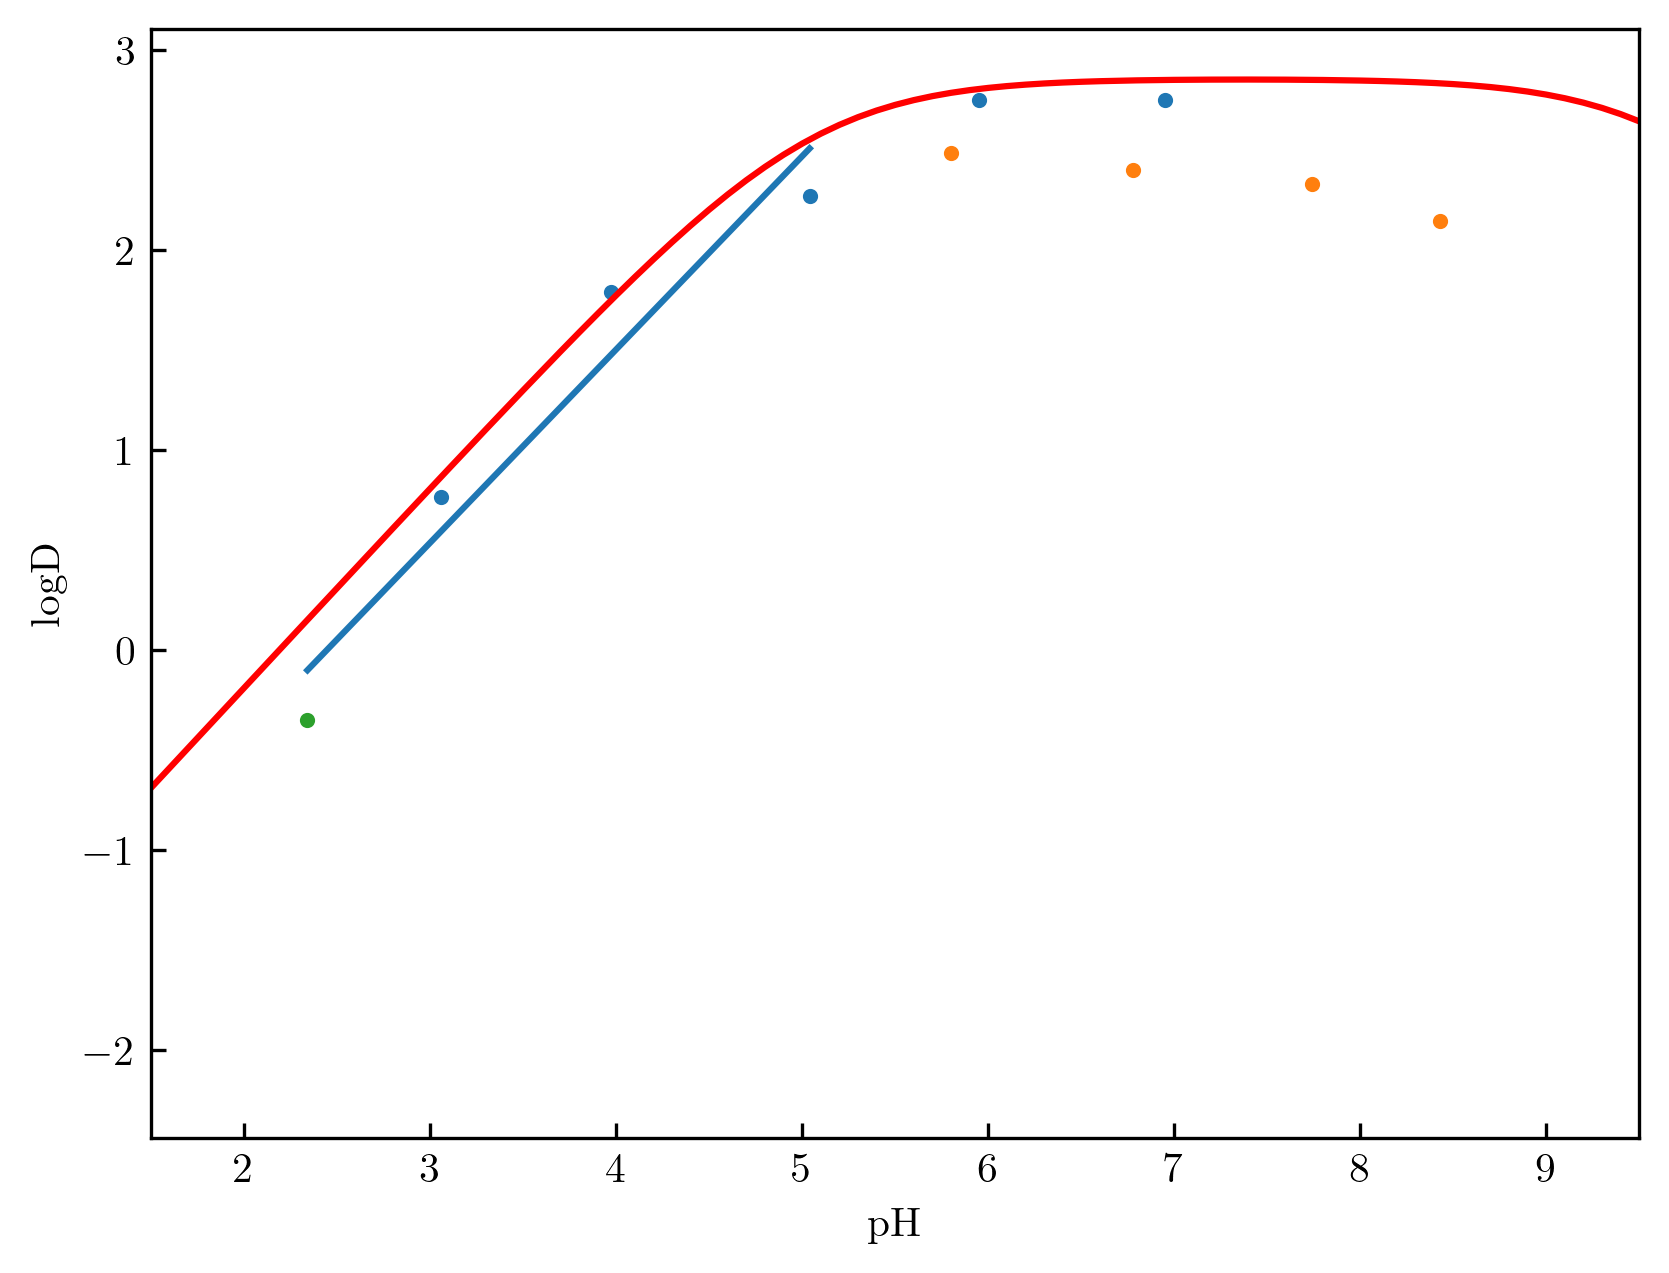

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

blanc0 = -0.003
pH0 = np.array([3.06, 3.97, 5.04, 5.95, 6.95])
abs0 = np.array([0.961, 1.108, 1.120, 1.124, 1.124, 1.126]) - blanc0 #水の吸光度が最後
logD0 = partition(pH0, abs0, 20,20)

blanc1 = 0.002
pH1 = np.array([5.80, 6.78, 7.74, 8.43]) 
abs1 = np.array([1.073, 1.070, 1.067, 1.057, 1.087]) - blanc1
logD1 = partition(pH1, abs1, 20, 5)

pH2 = np.array([2.34])
abs2 = np.array([0.317, 1.030])
logD2 = partition(pH2, abs2, 20, 20)

logD = [logD2] + [logD0]
logD = np.hstack([logD2, logD0])[0:4].reshape(-1,1)
pH = np.hstack([pH2, pH0])[0:4].reshape(-1,1)
model = LinearRegression()
model.fit(pH, logD)
logD_pred = model.predict(pH)

pH_r = np.arange(0,14.1,0.1)
H_r = 10**-pH_r
logD_r = np.log10(720/(H_r/9e-6 + 1 + 2e-10/H_r))



fig, ax = plt.subplots(dpi=300)
ax.set_xlabel("pH")
ax.set_xlim(1.5, 9.5)
ax.set_ylabel("logD")
    
ax.scatter(pH0, logD0, s=7)
ax.scatter(pH1, logD1, s=7)
ax.scatter(pH2, logD2, s=7)
ax.plot(pH_r, logD_r, color="red")
ax.plot(pH, logD_pred)

print("coefficient:", model.coef_)
print("score:", model.score(pH, logD))
plt.savefig("coef.pdf")

In [14]:
logD0,pH0

(array([0.76659309, 1.79044155, 2.27222851, 2.75089392, 2.75089392]),
 array([3.06, 3.97, 5.04, 5.95, 6.95]))